In [1]:
import numpy as np
import sympy as sp
import shared_functions as sf
from IPython.display import HTML
import ipywidgets as widgets
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10

IN the last notebooks we introduced the idea of a derivatie and integral. Note that we have done so following Falhaber, the appearance of a pattern and the sugesttion that this structure matters, in the same way as we introduced, the determinant is useful structure that appears often. 

Introducing this in just algebraic way has allowed us to sidestep usual complexity: the idea that of limits, and the slope of points is. But we also need to be acutely aware that we still haven't defined what a curve, polynomial expression, so in this notebook let's return tothis idea. NOte also that defininng a curve, without resorting to an imagined idea that lines converge to points, is actually very. So far we have been working We have dealt with it to and extent with polygonal splines, and, approxmiation. 

From the outset we are going to say that curves are a class polynomials, without any visual analogue. But at the same time we will use the idea of visualisations. Not only since the advent of calculus in the 1700s has this, but goes back to anqiuteity and we will start there. 

This notebook will be about providing cotnext, before we move on again. We will introduce the idea of conics and sections in this, which we will create Affine geomentry. The idea of conics. We will approach it in a novel wayIn this notebook we will look back to provide some context around algebraically presenting these curves frmo antiquity and also especially in context. There is a lovely chapter on conics in the Precalculus text and this weill allow us to make contact with this

Let's start with a formal definition for a curve we have seen before. In an early notebook, we presented with parameterisation [FIX] but now let's introduce an alternate. Let's start by understanding a definition of circle. 

<div style="background:gray; color:white; padding: 10px">

<h4>Formal Definition 4.4.3</h4>
<i>Proposition:</i><br/> A circle is determined by a a point $C = [r, s]$, $x$ and $y$ called the centre and a number $K$ called the quadrance and can be defined as: 
    
$$  (x-r)^2+(y-s)^2=K  $$
    
or equivalently
    
$$ x^2+y^2-2rx-2sy+r^2+s^2-K=0. $$
    
The variable point $X=[x,y] $ is incident with $c$ pricely when 
    
$$  Q(X,C)=K. $$


    


<br/><i>Related name:</i><br/> Algebraic definition of a circle
<br/><i>Ref. 1:</i> The defining properties of the quadratic equation are that there is no xy term, and that the coefficients of the x^2 and y^2 terms are equal and non-zero.


</div>

Note of course, that there is nothing visual about this definition. For us a circle is just a type of polynomical have already established an algebraic way of working, and we could choose whichever combinations of algebraic we migth imagine that would be consistent. Here we are elevating this combination, and giving it some names.  and it is possible to create sybmbols and use operations in the above way. Set of constraints. 

Let's start simply, by just verifying by expansion that the two forms are equivalent: 

In [2]:
x, y, r, s, K = sp.symbols('x, y, r, s, K')
e1 = sp.Eq(((x - r)**2 + (y - s)**2 ), K)
e1

Eq((-r + x)**2 + (-s + y)**2, K)

In [3]:
e1.expand()

Eq(r**2 - 2*r*x + s**2 - 2*s*y + x**2 + y**2, K)

So that seems to work all works with Python. Something else we could do is create a Python function to take a bunch of variables and return and equation to us: 

In [4]:
def create_equation_of_circle(x, y, r, s, K):
    return(sp.Eq((x - r)^2 + (y - s)^2, K))


Trying this with variables we have already created yields the following:  

In [5]:
e2 = create_equation_of_circle(x, y, r, s, K)
e2

Eq((-r + x)**2 + (-s + y)**2, K)

And of course, we could do the same thing with numbers

In [6]:
e3 = create_equation_of_circle(x, y, 4, 2, 25)
e3

Eq((x - 4)**2 + (y - 2)**2, 25)

sqrt(-(x - 9)*(x + 1)) + 2

I could of course solve this for $x$ or $y$ at this point. A likekly scenario is that I might have a range of $x$ values from which I will create $y$ values for. I could then plot them. We have noted that visualation is more of a isde effect. 

We can let Sympy solve for us and get two values: 

In [237]:
e11 = sp.solve(e3, y)
e11[0]

2 - sqrt(-(x - 9)*(x + 1))

In [238]:
e11[1]

sqrt(-(x - 9)*(x + 1)) + 2

As a python aside, I could also simulate the process of solving this a different way, and I might do this: 

In [231]:
def step_manipulate_equation(lhs, rhs, operation, expression = ""):
    if operation == "add":
        return sp.Eq(lhs + expression, rhs + expression)
    elif operation == "sub":
        return sp.Eq(lhs - expression, rhs - expression)
    elif operation == "sqrt":
        return sp.Eq(sp.sqrt(lhs), sp.sqrt(rhs))
    elif operation == "remove_abs":
        lhs_abs_removed = lhs.args[0]
        return([sp.Eq(lhs_abs_removed, rhs),sp.Eq(lhs_abs_removed, -rhs) ])

Let's set up the equation again. Note also that I am going to put a condition on y when I create it, just so I can manipulate things: 

In [232]:
x, r, s, K = sp.symbols('x, r, s, K')
y = sp.symbols('y', positive = True)
e3 = create_equation_of_circle(x, y, 4, 2, 25)
e3

Eq((x - 4)**2 + (y - 2)**2, 25)

Get y on on one side:

In [233]:
e4 = step_manipulate_equation(e3.lhs, e3.rhs, "sub", (x - 4)**2)
e4

Eq((y - 2)**2, 25 - (x - 4)**2)

Now square root both sides: 

In [234]:
e5 = step_manipulate_equation(e4.lhs, e4.rhs, "sqrt")
e5

Eq(Abs(y - 2), sqrt(25 - (x - 4)**2))

Now remove that absolute value. Note when we do this we get two equations: 

In [235]:
e6 = step_manipulate_equation(e5.lhs, e5.rhs, "remove_abs")
e6[0]

Eq(y - 2, sqrt(25 - (x - 4)**2))

In [236]:
e6[1]

Eq(y - 2, -sqrt(25 - (x - 4)**2))

And solve for y, again leaving us with two equations: 

In [13]:
e7 = step_manipulate_equation(e6[0].lhs, e6[0].rhs, 'add', 2)
e7

Eq(y, sqrt(25 - (x - 4)**2) + 2)

In [14]:
e8 = step_manipulate_equation(e6[1].lhs, e6[1].rhs, 'add', 2)
e8

Eq(y, 2 - sqrt(25 - (x - 4)**2))

While there is nothing visual about this, it would also be nice to verfiy that this has some kind of visual analoge. This is a little different to he paramaterisation we saw and involves some square roots which can make it a little complexet's solve this in Python. 

Finally, let's plot some values. Notice the domain here. I choose values below  -2 or above 10, otherwise would get negative square root and if I am not working with real numbers, we can't resolve. We are not dealing with complex numbers as yet. Even the radical itself provides 

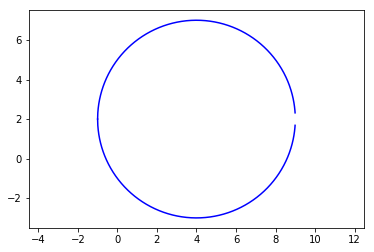

In [240]:
x_values = np.arange(-1, 9, 0.01)
y1 = [e11[0].subs(x, x_values[i]) for i in range(len(x_values))]
y2 = [e11[1].subs(x, x_values[i]) for i in range(len(x_values))]

fig, ax = plt.subplots()
ax.axis('equal')
ax.plot(x_values, y1, 'b')
ax.plot(x_values, y2, 'b')

So I certainly get something that looks like a circle. But it also challenges, should we really call this thing a circle? I am never going to get those final points. A constrained set of points this equation that I call a circle is not some infinite set of points, rather that it is really constrained and it's important to keep this in mind

Its worth noting that in many cases, these equation won't look like this form but can be dealth with, so for example  $x^2+y^2-6x+2y-3=0$, we can complete the square and solve to $(x-3)^2+(y+1)^2=13$

IN gneral, if we allow for the fact that  quadratic equation are that there is no xy term, and that the coefficients of the x2 and y2 terms are equal and non-zero.

Note that if If we have a quadratic equation with no xy term, and with the coefficients of the x2 and y2 terms equal and non-zero, then after dividing by that common coefficient, it has the form

$$ x^2+y^2-2rx-2sy+m=0 $$


for some numbers r,s and m. Then we complete the square to rewrite this as

$$(x-r)^2+(y-s)^2+m-r^2-s^2=0 $$

which by the identity we have created, is a circle with centre $[r,s]$ and quadrance $K=r^2+s^2-m$

<div style="background:#99ddff; color:black; padding: 10px">
<b>Add to these notes:</b>

Completing the squares is a simple operation and one that comes up up alot. But what if we wanted to implement this in python Sympy. Its actually a little difficult, we could of course break up more any thing to one side, then break up. 
    
</div>

Let's look at an interesting  example to consider is the following 
 $$ x^2+y^2+4x+1=0 $$
 
We can follow the standard strategy to complete the squares in order to get it itnot form here of course, and get 
$$  (x+2)^2+y^2=3 $$

When we do so, we will get a circle with a centre of $C = [-2,0]$ and a quadrance of 3, or radius as $\sqrt{3}$. 

Let's considder this in context of Fermat's theorom on sums o2 squares which states that an odd prime, $p$ can be extpressed as 

$$ p = n^2 + m^2 $$ with m, n integers precicely when $p\equiv 1 \pmod {4}$

Note also that if an integer is the sum of two rational squares then it is a sum of two integer squares. So if it is not a sum of two integer squares, then it is not the sum of two rational squares.Since $3\not\equiv 1 \pmod {4}$ , it follows that there are no rational numbers r and s satisfying $r^2+s^2=3$. 

Thus this circle also has no points lying on it. The appearance of a circle, and point joins two lines, but the circle is not a proper structure.  

Let's just include a furhter proof before the we move to consider a conic
 
 
 

<div style="background:gray; color:white; padding: 10px">

<h4>Proof 5.1.3</h4>
<i>Proposition:</i><br/> The centre and quadrance of a circle are unique.


<br/><b>Step x:</b> Let $x, y, r, s, r_1, s_1, K$ and $K_1$ be integers 
<br/><b>Step x:</b> Let $c$ be a circle denoted as
$$ c:\, (x-r)^2+(y-s)^2=K $$
<br/><b>Step x:</b> Let $c_1$ be a circle denoted as
$$c_1:\, (x-r_1)^2+(y-s_1)^2=K_1$$
<br/><b>Step x:</b> Manipulate by subtracting $c_1$ from $c$
$$2(r_1-r)x+r^2-r_1^2+2(s_1-s)y+s^2-s_1^2=K-K_1.$$
<br/><b>Step x:</b> From this identity of polynomials, we conclude that $r_1=r$, $s_1=s$, and that $K_1=K$.
    
   

    


    


<br/><i>Related name:</i><br/> Algebraic definition of a circle
<br/><i>Ref. 1:</i> The defining properties of the quadratic equation are that there is no xy term, and that the coefficients of the x^2 and y^2 terms are equal and non-zero.


</div>

<h4>Conic Sections</h4>

One of the challenges in mathematics is how to generalise. So far we have encountered straight lines, circles, parabola, ellipse, hyperbolas. All of these things are 2-dimensional, structures, we can generalise them all if we are willing to go to 3 dimensions. We can intuite this as a 3rd axis.  We need to keep in mind it is useful in studying 3D geometry which has wide applications. Allows us to think of a foundational general approach. What foundational structure would allows us to do this?

Let's createa conic section in python first. Now we don't know about $\pi$ or transcendental functions. So how can we construct this. We will use our circle parameterisation We will need two circles. Will grow i resolution, and leave us with surfaces we can use polygonal splines for. We can also cosntruct lines between wpoints

In [200]:
def compute_parameterised_point_from_circle(t):
    x1 = (1 - t^2) / ( 1 + t^2)
    x2 = (2 * t) / (1 + t^2)
    return([x1, x2])


No handles with labels found to put in legend.


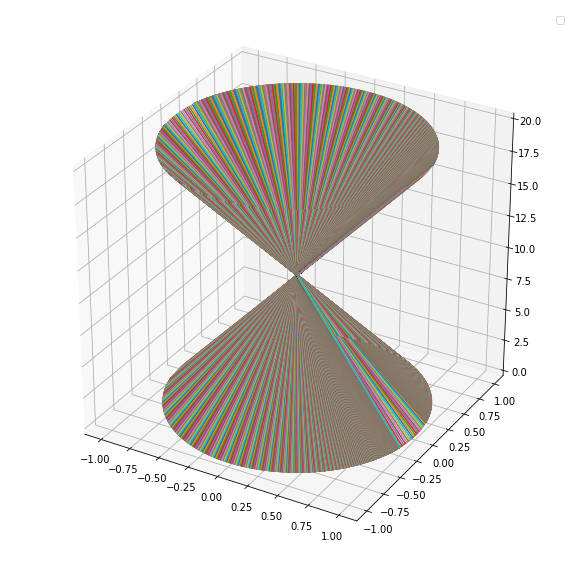

In [217]:
points_choice = np.array([compute_parameterised_point_from_circle(i) for i in np.arange(-10,10, .01)])

x1 = [e[0] for e in points_choice]
y1 = [e[1] for e in points_choice]


fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
z = np.zeros(len(x1))
ax.plot(x1, y1, z, )
ax.plot(x1, y1, z * 20)




[ax.plot([0,x1[i]],[0,y1[i]], [10, 0]) for i in range(1999)]
[ax.plot([0,-x1[i]],[0,-y1[i]], [10, 0]) for i in range(1999)]
[ax.plot([0,x1[i]],[0,y1[i]], [10, 20]) for i in range(1999)]
[ax.plot([0,-x1[i]],[0,-y1[i]], [10, 20]) for i in range(1999)]


ax.legend()
plt.show()

What is this structure? How can a plane go through it?

In [203]:
len(x1)

2000

So what next, I need to know, find the maximum

In [204]:
np.array(compute_parameterised_point_from_circle(1)) - np.array(compute_parameterised_point_from_circle(-1))

array([0, 2])

In [205]:
x1[0]

-0.9801980198019802

In [206]:
y1[0]


-0.19801980198019803

In [49]:
x1[1000]

1.0